# Average temperature dataset
Get the average temperature data for St. Louis, Missouri from NOOA website. Please note that the missing values
are coded with -99. Perform the following tasks:

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from itables import init_notebook_mode

* Import dataset.

In [12]:
data_folder = 'AverageTemperatureData/'
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
month_from = 0
month_to = 7

In [13]:
avg_temp_df = pd.DataFrame()
for month in months[month_from:month_to]:
    new_dataframe = pd.read_csv(f'{data_folder}data{month}.csv', header=4, usecols=['Date', 'Value'])
    new_dataframe.rename(columns={'Value': month}, inplace=True)
    new_dataframe.Date = new_dataframe.Date.apply(lambda x: int(str(x)[:-2]))
    new_dataframe.set_index('Date', inplace=True)
    avg_temp_df = pd.concat([avg_temp_df, new_dataframe], axis=1)
avg_temp_df.sort_values('Date', inplace=True)

In [14]:
avg_temp_df.head(10)

,JAN,FEB,MAR,APR,MAY,JUN,JUL
Date,,,,,,,
1938,NaN,NaN,NaN,57.3,65.6,74.3,81.3
1939,38.7,33.9,47.6,53.0,68.9,76.3,80.5
1940,14.9,33.1,43.0,54.1,63.6,76.5,79.5
1941,34.2,32.0,39.9,59.6,70.1,76.9,81.0
1942,31.6,33.4,46.3,60.1,65.7,75.1,80.6
1943,30.8,39.1,40.0,55.0,65.2,77.9,81.9
1944,36.2,37.4,41.0,53.4,71.2,79.5,79.6
1945,27.9,35.4,54.0,56.9,61.3,71.0,77.5
1946,33.6,40.1,56.5,60.5,62.8,76.6,80.1


In [15]:
avg_temp_df.tail(10)

,JAN,FEB,MAR,APR,MAY,JUN,JUL
Date,,,,,,,
2015,32.8,26.4,46.0,59.8,69.1,77.2,80.1
2016,33.5,39.8,52.6,59.4,66.0,80.8,81.1
2017,37.5,47.2,49.5,61.8,68.2,77.9,83.8
2018,30.1,38.4,43.5,50.2,75.8,80.7,80.6
2019,31.2,35.2,43.0,58.8,68.2,75.6,81.7
2020,36.1,37.6,51.0,55.1,65.1,79.0,82.5
2021,35.0,26.5,52.1,57.1,65.3,78.9,79.6
2022,29.5,34.6,49.2,56.5,69.2,79.3,82.9
2023,39.5,43.2,45.9,58.5,69.8,77.2,81.5


* Locate missing values and change them to nan.

In [16]:
avg_temp_df.iloc[-12]

JAN    35.7
FEB    35.7
MAR   -99.0
APR    55.5
MAY    67.2
JUN    76.0
JUL    77.9
Name: 2013, dtype: float64

In [17]:
avg_temp_df.replace(to_replace=-99., value=float('nan'), inplace=True)
avg_temp_df.iloc[-12]

JAN    35.7
FEB    35.7
MAR     NaN
APR    55.5
MAY    67.2
JUN    76.0
JUL    77.9
Name: 2013, dtype: float64

* Use the interpolate function to put a value in the Nan’s place

In [18]:
avg_temp_df.interpolate(method='linear', axis=0, inplace=True)
avg_temp_df.iloc[-12]

JAN    35.70
FEB    35.70
MAR    51.55
APR    55.50
MAY    67.20
JUN    76.00
JUL    77.90
Name: 2013, dtype: float64

In [19]:
avg_temp_df.tail(2)

,JAN,FEB,MAR,APR,MAY,JUN,JUL
Date,,,,,,,
2023,39.5,43.2,45.9,58.5,69.8,77.2,81.5
2024,32.0,43.2,45.9,58.5,69.8,77.2,81.5


* Plot the average temperature time series, the corresponding histogram, and kernel density plot.

C:\Users\thejg\Desktop\Programming\projects39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\thejg\Desktop\Programming\projects39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\thejg\Desktop\Programming\projects39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\t

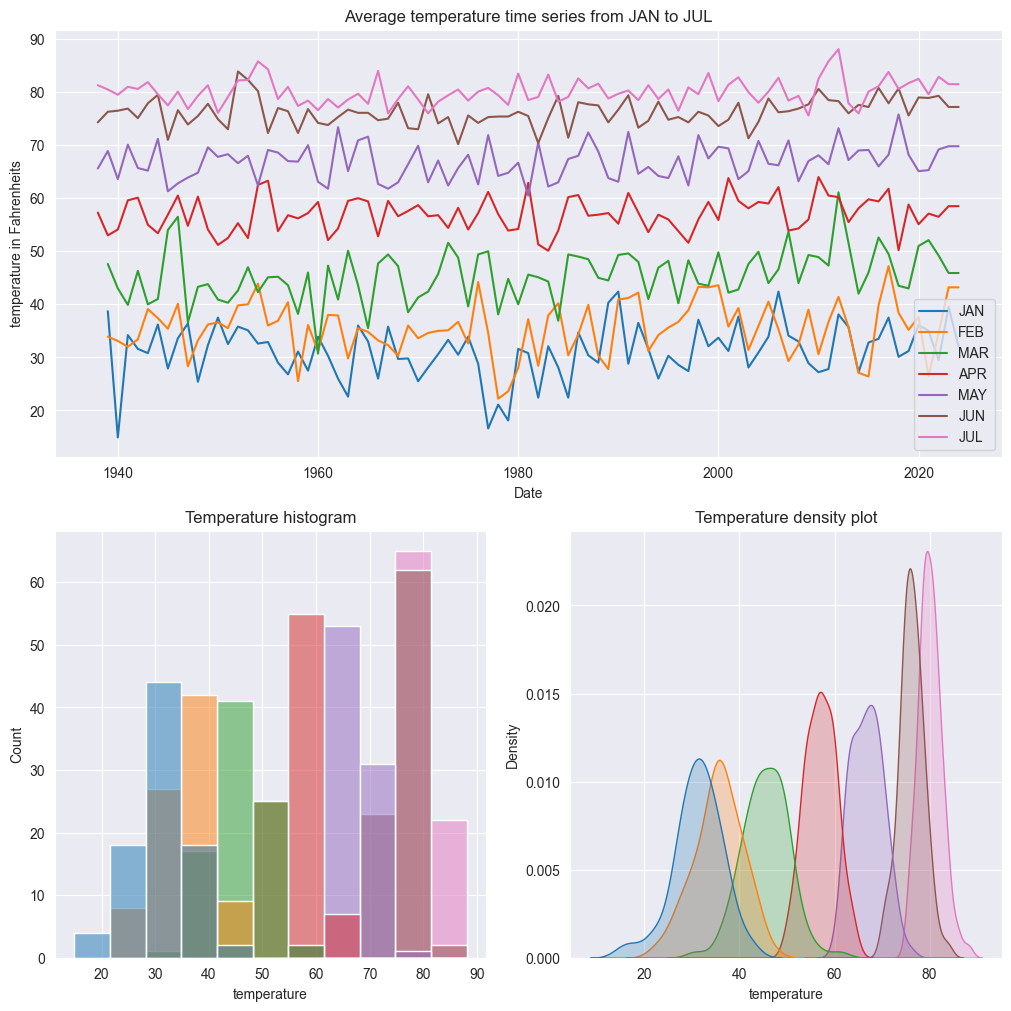

In [20]:
figure, axes = plt.subplot_mosaic([['time', 'time'], ['hist', 'kde']], layout='constrained', figsize=(10, 10))
avg_temp_df.plot(kind='line', ax=axes['time'], grid=True)
axes['time'].set(title=f'Average temperature time series from {months[month_from]} to {months[month_to - 1]}', ylabel='temperature in Fahrenheits')

sns.histplot(data=avg_temp_df, ax=axes['hist'], alpha=0.5, legend=False)
axes['hist'].set(title='Temperature histogram', xlabel='temperature')

sns.kdeplot(data=avg_temp_df, ax=axes['kde'], fill=True, legend=False)
axes['kde'].set(title='Temperature density plot', xlabel='temperature')
figure.savefig('./images/AverageTemperature1.png');

* Generate descriptive statistics

In [21]:
avg_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 1938 to 2024
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JAN     86 non-null     float64
 1   FEB     86 non-null     float64
 2   MAR     86 non-null     float64
 3   APR     87 non-null     float64
 4   MAY     87 non-null     float64
 5   JUN     87 non-null     float64
 6   JUL     87 non-null     float64
dtypes: float64(7)
memory usage: 5.4 KB


In [22]:
avg_temp_df.describe()

,JAN,FEB,MAR,APR,MAY,JUN,JUL
count,86.000000,86.000000,86.000000,87.000000,87.000000,87.000000,87.000000
mean,31.187209,35.487209,45.493605,57.013793,66.860920,76.190805,80.105747
std,5.178526,5.051029,4.867055,3.220544,3.294829,2.575449,2.397157
min,14.900000,22.200000,30.700000,50.100000,60.500000,70.200000,75.600000
25%,28.225000,32.450000,42.450000,54.300000,64.050000,74.650000,78.500000
50%,31.400000,35.650000,45.650000,56.900000,66.900000,76.200000,80.000000
75%,34.175000,39.075000,48.975000,59.450000,69.150000,77.850000,81.450000
max,42.400000,47.200000,61.100000,64.000000,75.800000,83.900000,88.100000


* Convert the index to datetime format.

In [23]:
avg_temp_df.index

Index([1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024],
      dtype='int64', name='Date')

In [24]:
pd.to_datetime(avg_temp_df.index, format='%Y')

DatetimeIndex(['1938-01-01', '1939-01-01', '1940-01-01', '1941-01-01',
               '1942-01-01', '1943-01-01', '1944-01-01', '1945-01-01',
               '1946-01-01', '1947-01-01', '1948-01-01', '1949-01-01',
               '1950-01-01', '1951-01-01', '1952-01-01', '1953-01-01',
               '1954-01-01', '1955-01-01', '1956-01-01', '1957-01-01',
               '1958-01-01', '1959-01-01', '1960-01-01', '1961-01-01',
               '1962-01-01', '1963-01-01', '1964-01-01', '1965-01-01',
               '1966-01-01', '1967-01-01', '1968-01-01', '1969-01-01',
               '1970-01-01', '1971-01-01', '1972-01-01', '1973-01-01',
               '1974-01-01', '1975-01-01', '1976-01-01', '1977-01-01',
               '1978-01-01', '1979-01-01', '1980-01-01', '1981-01-01',
               '1982-01-01', '1983-01-01', '1984-01-01', '1985-01-01',
               '1986-01-01', '1987-01-01', '1988-01-01', '1989-01-01',
               '1990-01-01', '1991-01-01', '1992-01-01', '1993-01-01',
      

* Create a four-column table shown below the temperature plot at the NOOA website

In [25]:
avg_temp_all = pd.read_csv(f'{data_folder}dataALL.csv', header=4, usecols=['Date', 'Value'])
avg_temp_all.rename(columns={'Value': 'Temperature'}, inplace=True)
avg_temp_all.Date = avg_temp_all.Date.apply(lambda x: str(x)[:-2] + '-' + str(x)[-2:])
avg_temp_all.set_index('Date', inplace=True)
avg_temp_all.replace(to_replace=-99., value=float('nan'), inplace=True)
avg_temp_all.interpolate(method='linear', axis=0, inplace=True)
avg_temp_all.index = pd.to_datetime(avg_temp_all.index, format='%Y-%m')
avg_temp_all

,Temperature
Date,
1938-04-01,57.3
1938-05-01,65.6
1938-06-01,74.3
1938-07-01,81.3
1938-08-01,82.0
...,...
2023-09-01,74.2
2023-10-01,61.2
2023-11-01,49.6


In [26]:
monthly_avg = avg_temp_all.Temperature.groupby(avg_temp_all.index.month).mean()
monthly_avg

Date
1     31.187209
2     35.396471
3     45.418824
4     56.996512
5     66.826744
6     76.179070
7     80.089535
8     78.375581
9     70.712791
10    59.212791
11    45.851163
12    35.529070
Name: Temperature, dtype: float64

In [27]:
# init_notebook_mode(all_interactive=True)

In [28]:
avg_temp_all['Rank'] = avg_temp_all.Temperature.rank(method='first', axis=0).apply(int)
avg_temp_all['1901-2000 Monthly Mean'] = avg_temp_all.index.month.map(lambda x: monthly_avg.loc[x])
avg_temp_all['Anomaly'] = avg_temp_all.Temperature - avg_temp_all['1901-2000 Monthly Mean']
avg_temp_all

,Temperature,Rank,1901-2000 Monthly Mean,Anomaly
Date,,,,
1938-04-01,57.3,499,56.996512,0.303488
1938-05-01,65.6,634,66.826744,-1.226744
1938-06-01,74.3,786,76.179070,-1.879070
1938-07-01,81.3,995,80.089535,1.210465
1938-08-01,82.0,1004,78.375581,3.624419
...,...,...,...,...
2023-09-01,74.2,785,70.712791,3.487209
2023-10-01,61.2,575,59.212791,1.987209
2023-11-01,49.6,406,45.851163,3.748837


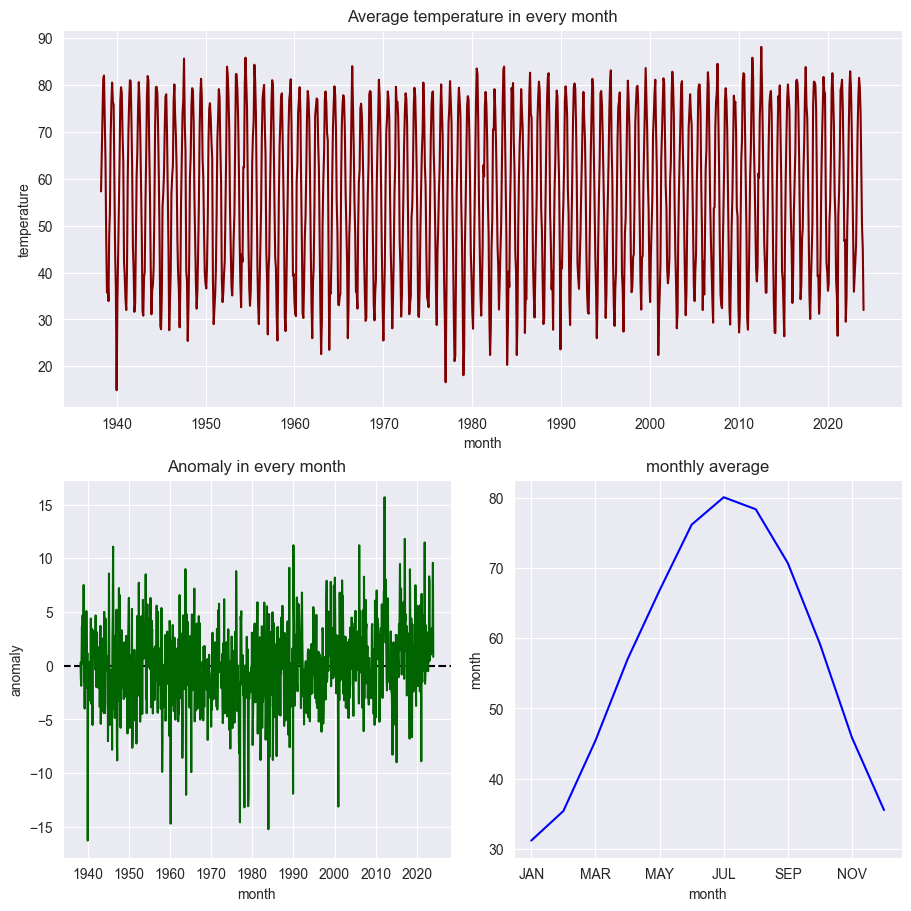

In [30]:
figure2, axes2 = plt.subplot_mosaic([['temp', 'temp'], ['anom', 'month']], layout='constrained', figsize=(9, 9))
axes2['temp'].plot(avg_temp_all.Temperature, color='maroon')
# axes2['temp'].grid()
axes2['temp'].set(title='Average temperature in every month', xlabel='month', ylabel='temperature')
axes2['anom'].axhline(0, linestyle='--', color='black')
axes2['anom'].plot(avg_temp_all.Anomaly, color='darkgreen')
# axes2['anom'].grid()
axes2['anom'].set(title='Anomaly in every month', xlabel='month', ylabel='anomaly')
axes2['month'].plot(monthly_avg, color='blue')
# axes2['month'].grid()
axes2['month'].set(title='monthly average', xlabel='month', ylabel='month')
axes2['month'].set_xticks(range(1, len(months) + 1, 2), months[::2])
figure2.savefig('./images/AverageTemperature2.png');